Cargar las librerías iniciales

In [82]:
# librerías generales
import pandas as pd
import numpy as np
import scikitplot as skplt # pip install scikitplot
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

Cargar los datos del archivo

In [83]:
def load_bank_data():
    """
    Load bank data from a CSV file and set the index to 'cod_cliente'.

    Returns:
    bank_data (pandas.DataFrame): The loaded bank data with 'cod_cliente' as the index.
    """
    _raw = pd.read_csv('data/raw/bank-sem-entrenamiento.csv')
    bank_data = pd.DataFrame(_raw)
    bank_data.set_index('cod_cliente', inplace=True)
    return bank_data

Entendimiento del negocio
- Estadísticas 
- Correlaciones


In [84]:
# Cargar los datos 
bank_data = load_bank_data()
bank_data.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client65,42,14.70,3217.68,334.04,0.00,334.04,3217.68,183.92,0.0,0.00,...,0.0,0.0,3217.68,0.0,-967.72,372.00,10,5,21,S
Client121,27,133.94,33238.77,220.21,1792.24,220.21,33238.77,31.19,0.0,622.22,...,0.0,0.0,33118.55,0.0,-320.29,1132.14,5,3,0,S
Client173,39,109.07,7054.84,1248.12,0.00,1248.12,7054.84,711.63,0.0,759.08,...,0.0,0.0,5445.42,0.0,-42.38,347.00,3,3,14,S
Client307,52,24.14,15956.21,1690.88,0.00,1690.88,15956.21,711.65,0.0,749.00,...,0.0,0.0,15859.21,0.0,-444.21,1856.86,8,3,4,N
Client359,28,92.13,4273.46,469.44,0.00,469.44,4273.46,135.34,0.0,0.00,...,0.0,0.0,4273.46,0.0,-302.49,973.93,6,3,0,S


In [85]:
bank_data.describe

<bound method NDFrame.describe of              edad_cliente  margen_beneficio  sdo_financiacion  sdo_inversion   
cod_cliente                                                                    
Client65               42             14.70           3217.68         334.04  \
Client121              27            133.94          33238.77         220.21   
Client173              39            109.07           7054.84        1248.12   
Client307              52             24.14          15956.21        1690.88   
Client359              28             92.13           4273.46         469.44   
...                   ...               ...               ...            ...   
Client76027            47             45.21          17964.92         964.09   
Client76115            58              7.02              0.00           7.29   
Client76196            45              4.06            581.84        1739.74   
Client76350            31           -372.91              0.00       15554.15   
Client

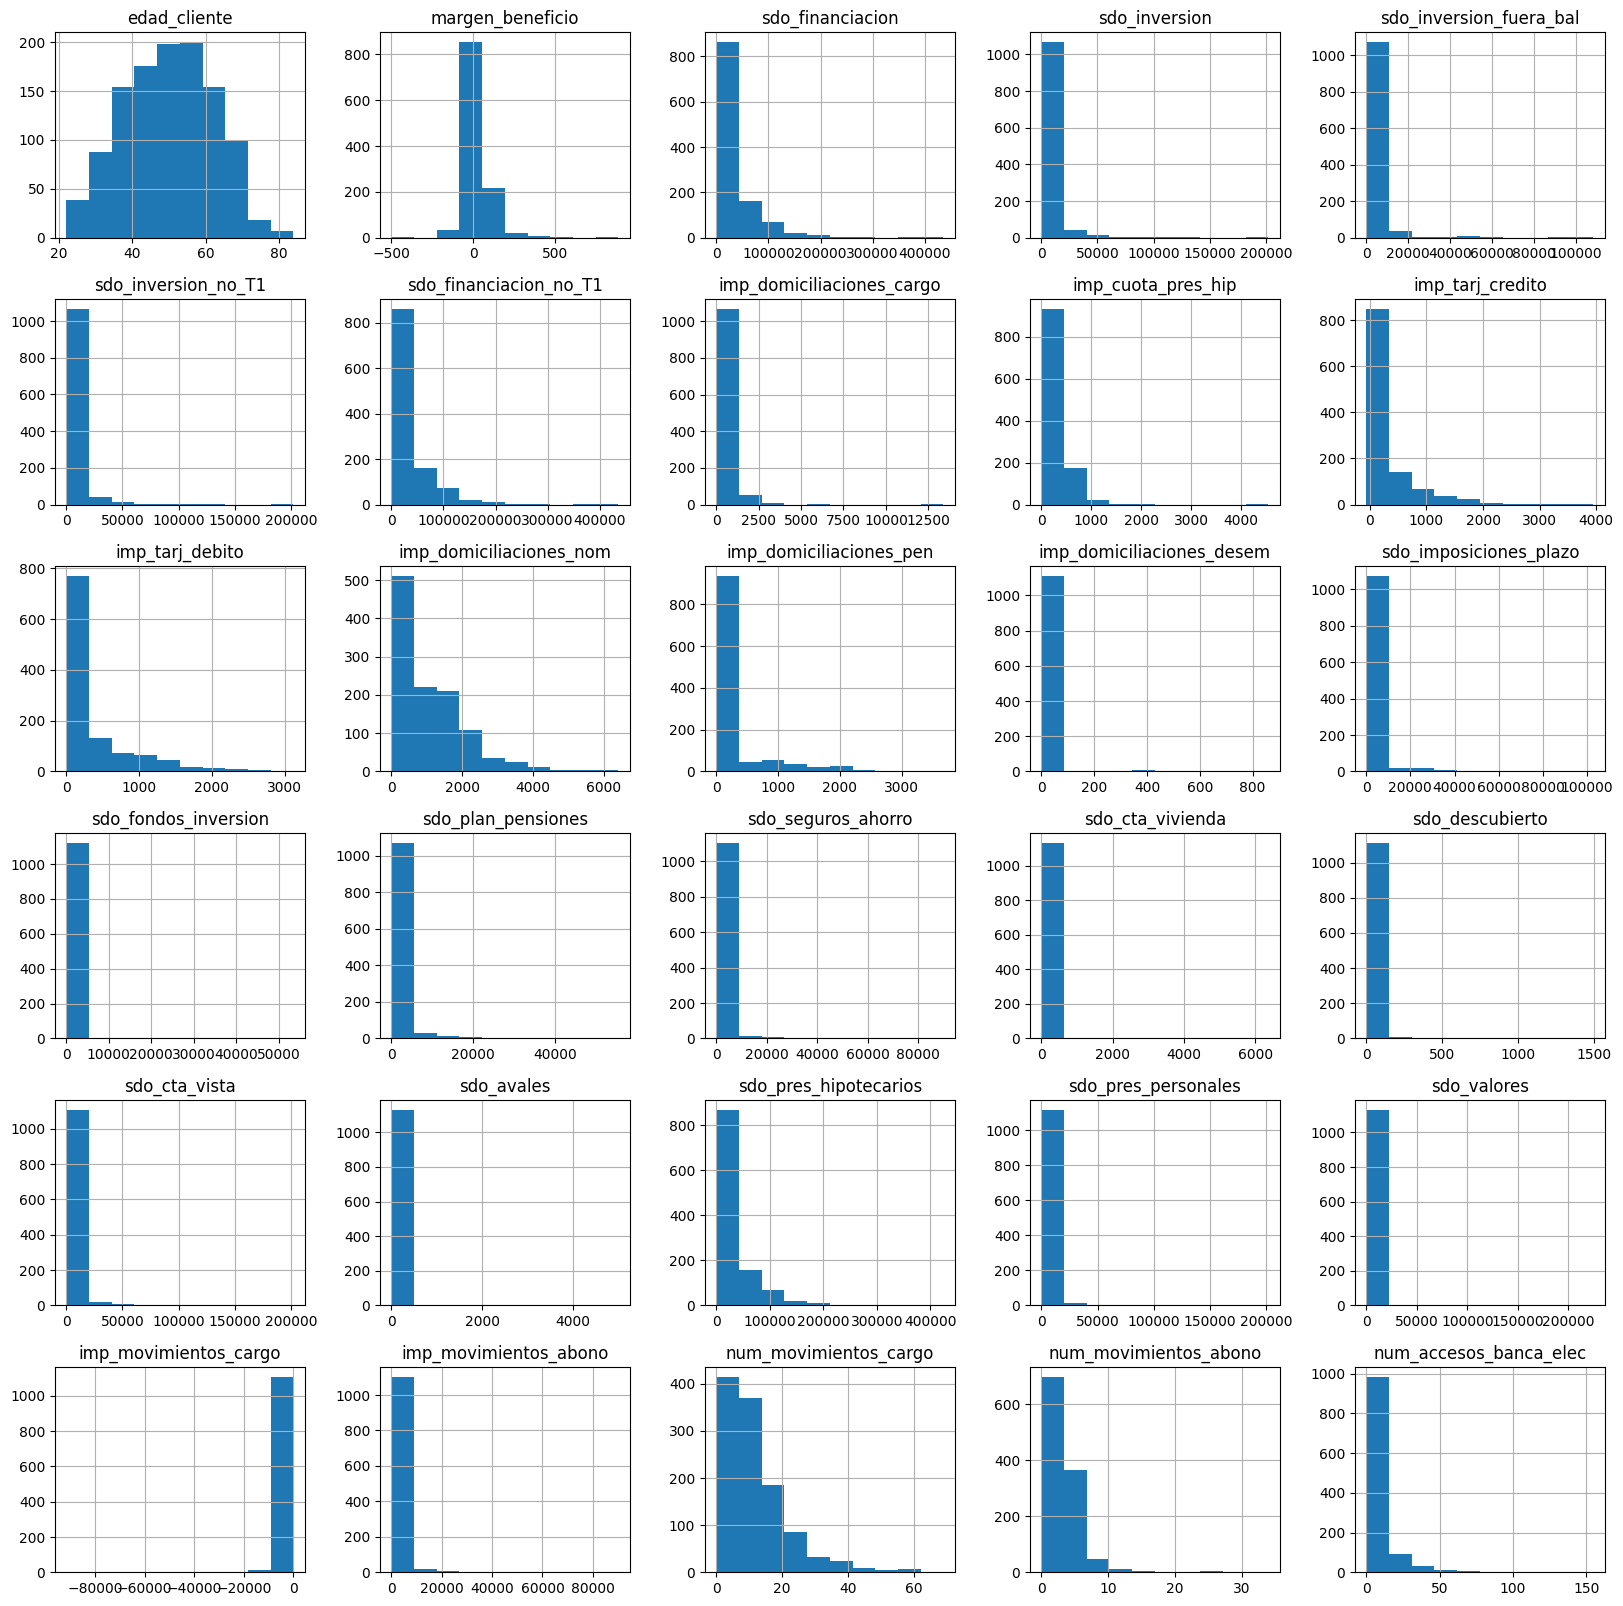

In [111]:
bank_data.hist(figsize=(20, 20))
plt.show()
#bank_data.histo


In [86]:
# identificar clase objetivo y variables independientes

X = bank_data.loc[:, bank_data.columns != 'flag']  ## consultar mañana
y = bank_data['flag']

# partir en train y test
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# modelo de preprocesamiento obtenido desde el conjunto de entrenamiento
md_prepro = StandardScaler()
md_prepro.fit(X_train)

StandardScaler()

In [87]:
# escalamos conjunto entrenamiento
X_train_scaled = md_prepro.transform(X_train)

# visualizamos estadísticas
df_describe = pd.DataFrame(X_train_scaled)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,...,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02
mean,-2.419250e-16,-2.688056e-17,-8.960186e-18,4.592095e-17,4.480093e-18,2.688056e-17,3.584074e-17,-3.136065e-17,-5.376111e-17,-8.960186e-18,...,5.376111e-17,-1.792037e-17,1.792037e-17,2.688056e-17,5.600116e-18,2.688056e-17,-1.568033e-17,7.616158e-17,2.352049e-17,-1.120023e-18
std,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,...,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00
min,-2.318882e+00,-7.315980e+00,-6.208709e-01,-4.159908e-01,-2.654670e-01,-4.095551e-01,-6.219428e-01,-7.260832e-01,-6.386445e-01,-6.488852e-01,...,-3.868603e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,-1.901675e+01,-3.219349e-01,-1.155814e+00,-1.074057e+00,-4.625853e-01
25%,-7.437233e-01,-3.508370e-01,-6.186005e-01,-3.866998e-01,-2.654670e-01,-3.805978e-01,-6.196394e-01,-6.082595e-01,-6.386445e-01,-5.258414e-01,...,-3.471854e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,-8.966952e-04,-3.219349e-01,-6.574664e-01,-1.074057e+00,-4.625853e-01
50%,2.404503e-03,-1.788735e-01,-4.769725e-01,-2.959829e-01,-2.654670e-01,-2.938270e-01,-4.681837e-01,-2.944912e-01,-6.386445e-01,-5.258414e-01,...,-2.330936e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,1.747232e-01,-2.150746e-01,-2.587886e-01,-6.966174e-02,-4.625853e-01
75%,7.485323e-01,3.088399e-01,2.885078e-01,-4.719479e-02,-2.555983e-01,-5.406673e-02,2.833004e-01,1.803191e-01,5.292402e-01,1.508997e-01,...,2.114108e-02,-4.427792e-02,2.927547e-01,-1.482642e-01,-5.161717e-02,2.745006e-01,5.840507e-03,4.388975e-01,2.651368e-01,7.667254e-02
max,2.821109e+00,5.664294e+00,8.267568e+00,1.482868e+01,1.263453e+01,1.420404e+01,8.206259e+00,1.014076e+01,1.273437e+01,6.353501e+00,...,2.177184e+01,2.694894e+01,8.211441e+00,2.191783e+01,2.625382e+01,3.237740e-01,1.889774e+01,4.924023e+00,1.030909e+01,9.985536e+00


# ÁRBOL DE DECISION

### Ejemplo 1

El algoritmo de árboles de clasificación es un método de aprendizaje supervisado utilizado para la clasificación de datos. Se basa en la construcción de un árbol de decisiones, donde cada nodo interno representa una característica o atributo, y cada rama representa una posible decisión o resultado. 

El árbol de clasificación se construye de manera recursiva dividiendo el conjunto de datos en subconjuntos más pequeños, de acuerdo con los valores de los atributos. La división se realiza de manera que se maximice la pureza de las clases en cada subconjunto resultante. 

Una vez construido el árbol, se puede utilizar para clasificar nuevos datos, siguiendo el camino desde la raíz hasta una hoja, tomando las decisiones correspondientes en cada nodo interno. La clase asignada al nuevo dato será la clase mayoritaria en la hoja correspondiente.

El árbol de clasificación es una técnica ampliamente utilizada en problemas de clasificación, ya que es fácil de interpretar y puede manejar tanto variables categóricas como numéricas. Sin embargo, puede ser propenso al sobreajuste si no se controla adecuadamente la profundidad del árbol o se utilizan técnicas de poda.



In [88]:
# construcción del modelo y entrenamiento
np.random.seed(123)
md_tree = DecisionTreeClassifier()
md_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
# predicción del conjunto de test
y_pred = md_tree.predict(X_test)

# dataframe con datos entrada y prediccion
o_pred = pd.concat([X_test,y_test],axis=1)
o_pred['class_pred']=y_pred
o_pred.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag,class_pred
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client22056,52,57.42,11403.18,2400.78,3441.27,2400.78,11403.18,773.02,0.0,1904.95,...,0.00,9124.69,0.00,-19.89,1942.34,5,6,74,S,S
Client14206,43,67.23,816.20,24904.34,0.00,24904.34,816.20,1195.45,0.0,576.60,...,0.00,0.00,0.00,-3880.20,3394.51,28,12,13,N,N
Client14182,42,12.35,0.00,40.45,0.00,40.45,0.00,11.20,0.0,0.00,...,0.00,0.00,0.00,-257.20,268.56,10,3,0,S,S
Client72494,41,74.47,49701.51,5714.95,0.00,5714.95,49701.51,23.00,442.9,0.00,...,49701.51,0.00,2418.05,-464.01,0.00,10,0,20,N,N
Client47681,41,19.24,0.00,318.87,0.00,318.87,0.00,598.95,0.0,0.00,...,0.00,0.00,0.00,-43.35,352.00,3,3,0,S,N


In [90]:
# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[114  56]
 [ 68 102]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.63      0.67      0.65       170
           S       0.65      0.60      0.62       170

    accuracy                           0.64       340
   macro avg       0.64      0.64      0.63       340
weighted avg       0.64      0.64      0.63       340



### Ejemplo 2

In [92]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_tree.predict_proba(X_test)
y_test_proba_predict[:5,]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

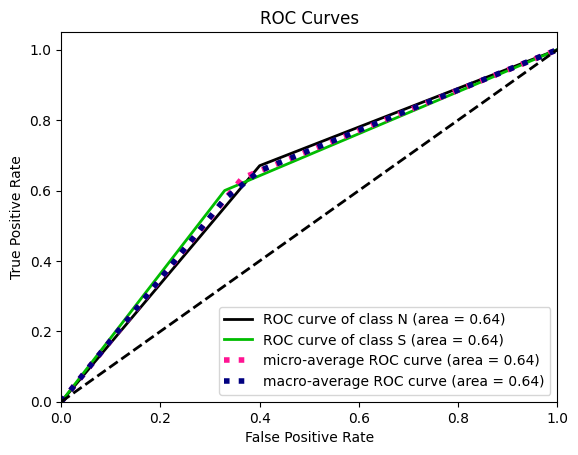

In [93]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

In [94]:
# reglas del arbol
nombres = list(X.columns)
tree_rules = export_text(md_tree, feature_names=nombres)
print(tree_rules)

|--- sdo_pres_personales <= 275.58
|   |--- sdo_inversion <= 1410.18
|   |   |--- margen_beneficio <= -5.58
|   |   |   |--- imp_domiciliaciones_cargo <= 58.43
|   |   |   |   |--- num_accesos_banca_elec <= 38.00
|   |   |   |   |   |--- edad_cliente <= 36.50
|   |   |   |   |   |   |--- sdo_inversion_fuera_bal <= 122.09
|   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |   |--- sdo_inversion_fuera_bal >  122.09
|   |   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- edad_cliente >  36.50
|   |   |   |   |   |   |--- imp_cuota_pres_hip <= 247.22
|   |   |   |   |   |   |   |--- imp_cuota_pres_hip <= 229.07
|   |   |   |   |   |   |   |   |--- class: N
|   |   |   |   |   |   |   |--- imp_cuota_pres_hip >  229.07
|   |   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |   |--- imp_cuota_pres_hip >  247.22
|   |   |   |   |   |   |   |--- class: N
|   |   |   |   |--- num_accesos_banca_elec >  38.00
|   |   |   |   |   |--- class: S
|   |   |   |--- imp_d

[Text(0.6247991276400368, 0.9722222222222222, 'sdo_pres_personales <= 275.58\ngini = 0.5\nsamples = 793\nvalue = [398, 395]'),
 Text(0.37172865013774103, 0.9166666666666666, 'sdo_inversion <= 1410.18\ngini = 0.474\nsamples = 565\nvalue = [347, 218]'),
 Text(0.15013774104683195, 0.8611111111111112, 'margen_beneficio <= -5.58\ngini = 0.49\nsamples = 250\nvalue = [107, 143]'),
 Text(0.06611570247933884, 0.8055555555555556, 'imp_domiciliaciones_cargo <= 58.435\ngini = 0.401\nsamples = 54\nvalue = [39, 15]'),
 Text(0.03673094582185491, 0.75, 'num_accesos_banca_elec <= 38.0\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.02938475665748393, 0.6944444444444444, 'edad_cliente <= 36.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.014692378328741965, 0.6388888888888888, 'sdo_inversion_fuera_bal <= 122.09\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0073461891643709825, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02203856749311295, 0.583333333333

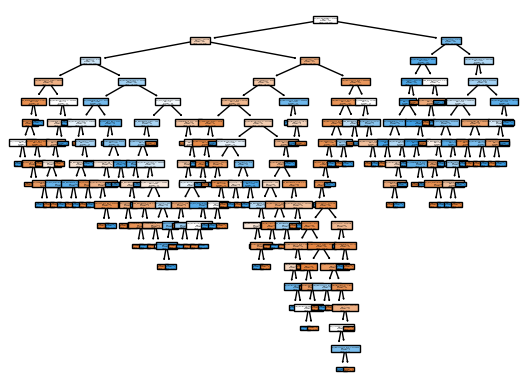

In [95]:
# visualización del árbol
tree.plot_tree(md_tree, feature_names=nombres, filled=True)

### KNN

KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. En el caso de la clasificación, KNN asigna una etiqueta a un nuevo punto de datos basándose en las etiquetas de los puntos de datos vecinos más cercanos. La idea principal detrás de KNN es que los puntos de datos similares tienden a estar cerca unos de otros en el espacio de características.



In [112]:

# construcción del modelo
from sklearn.neighbors import KNeighborsClassifier

# Normalize the data
md_prepro = StandardScaler()
X_train_scaled = md_prepro.fit_transform(X_train)
X_test_scaled = md_prepro.transform(X_test)


np.random.seed(123)
md_knn = KNeighborsClassifier()
md_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [113]:
# predicción del conjunto de test
y_pred = md_knn.predict(X_test)   ## TODO: consultar con Rosiris si tuvo que hacer este ajuste

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[154  16]
 [158  12]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.49      0.91      0.64       170
           S       0.43      0.07      0.12       170

    accuracy                           0.49       340
   macro avg       0.46      0.49      0.38       340
weighted avg       0.46      0.49      0.38       340



### Naive Bayes

In [116]:
#############################################
## NB
#############################################

# construcción del modelo

X_train_desnormalized = md_prepro.inverse_transform(X_train_scaled)
X_test_desnormalized = md_prepro.inverse_transform(X_test_scaled)

from sklearn.naive_bayes import GaussianNB

np.random.seed(123)
md_nb = GaussianNB()
md_nb.fit(X_train_desnormalized, y_train)

GaussianNB()

In [117]:
# predicción del conjunto de test
y_pred = md_nb.predict(X_test_desnormalized)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[ 13 157]
 [  4 166]]


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.76      0.08      0.14       170
           S       0.51      0.98      0.67       170

    accuracy                           0.53       340
   macro avg       0.64      0.53      0.41       340
weighted avg       0.64      0.53      0.41       340



In [119]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_tree.predict_proba(X_test)

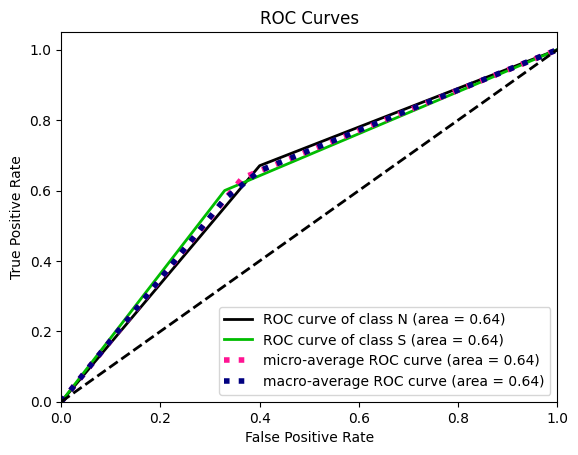

In [120]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

### SVM - Support Vector Machines

In [121]:
#############################################
## SVM
#############################################

# construcción del modelo
from sklearn.svm import SVC

np.random.seed(123)
md_svm = SVC(probability=True)
md_svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [123]:
# predicción del conjunto de test
y_pred = md_svm.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[123  47]
 [ 43 127]]


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.74      0.72      0.73       170
           S       0.73      0.75      0.74       170

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.74      0.74      0.74       340



In [125]:

# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_svm.predict_proba(X_test_scaled)

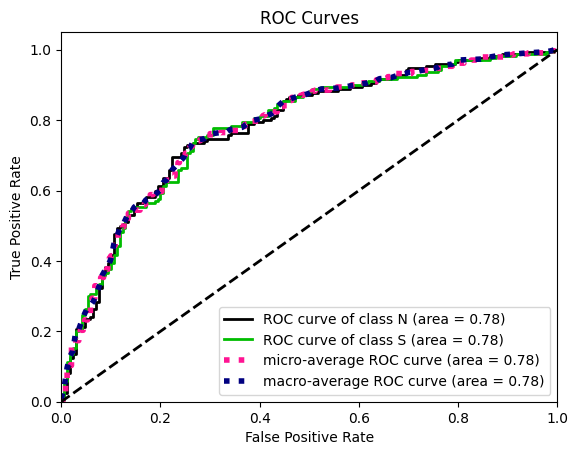

In [126]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

### RNN

In [127]:

# construcción del modelo
from sklearn.neural_network import MLPClassifier

np.random.seed(123)
md_ann = MLPClassifier(max_iter=600)
md_ann.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=600)

In [128]:
# predicción del conjunto de test
y_pred = md_ann.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[126  44]
 [ 51 119]]


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.71      0.74      0.73       170
           S       0.73      0.70      0.71       170

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340

